<a href="https://colab.research.google.com/github/MaLuisa7/Big_Data/blob/main/tweet_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este codigo lo obtuve siguiendo esta pagina : [towards ai](https://towardsai.net/p/programming/tweet-topic-modeling-part-2-cleaning-and-preprocessing-tweets)

In [4]:
pip install tweet-preprocessor

In [7]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
!pip install ekphrasis
!pip install tweet-preprocessor
import preprocessor as p

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
path  = '/content/drive/MyDrive/sentiment140/Sentiment140.csv'
colnames = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(path, encoding='latin-1', names = colnames)
df.target = df.target.replace({4: 1})
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [24]:
pct10 = int(len(df) * .01)
pct_sample = int(pct10 * .1)
print(pct10,pct_sample)

16000 1600


In [29]:
# split data into train y test
df_1 = df.query("target == 1").reset_index(drop=True).sample(n=pct10, replace=True, random_state=7).iloc[:, [0, -1]]
df_0 = df.query("target == 0").reset_index(drop=True).sample(n=pct10,replace=True, random_state=7).iloc[:,[0, -1]]  # (800000, 6)
df_sample =  pd.concat([df_1, df_0], axis=0)  # 32000
print(len(df_1), len(df_0), len(df_sample))

df4_sample = df_4.sample(n=pct_sample, replace=True, random_state=7)  # 1600
df0_sample = df_0.sample(n=pct_sample, replace=True, random_state=7)  # 1600
print(len(df4_sample), len(df0_sample))
df_40 = pd.concat([df4_sample, df0_sample], axis=0)  # 3200

16000 16000 32000
1600 1600


In [36]:
lst_clean1 =[]
for i in range(0, len(df_sample)):
  clean_text = p.clean(df_sample['text'].iloc[i])
  lst_clean1.append(clean_text)

df_sample['text_clean1'] = lst_clean1
df_sample.head()

,target,text,cleaning_1,text_clean1
585903,1,Gina_M_Bby: nah. We're hitting the streets! Ye...,Gina_M_Bby: nah. We're hitting the streets! Ye...,Gina_M_Bby: nah. We're hitting the streets! Ye...
189636,1,"Things to do today: stay in school all day, no...","Things to do today: stay in school all day, no...","Things to do today: stay in school all day, no..."
573977,1,i know its a lil late...but- #followfriday @to...,i know its a lil late...but- theyre cool peopl...,i know its a lil late...but- theyre cool peopl...
535030,1,33 followers now..yay!! Thank u all,followers now..yay!! Thank u all,followers now..yay!! Thank u all
759363,1,@K4Ge lol Quite nice to hear,lol Quite nice to hear,lol Quite nice to hear


In [37]:
def preprocess_data(data):
  #Removes Numbers
  data = data.astype(str).str.replace('\d+', '')
  lower_text = data.str.lower()
  lemmatizer = nltk.stem.WordNetLemmatizer()
  w_tokenizer =  TweetTokenizer()

  def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

  def remove_punctuation(words):
    new_words = []
    for word in words:
      new_word = re.sub(r'[^\w\s]', '', (word))
      if new_word != '':
          new_words.append(new_word)
    return new_words

  words = lower_text.apply(lemmatize_text)
  words = words.apply(remove_punctuation)
  return pd.DataFrame(words)

In [38]:
pre_tweets = preprocess_data(df_sample.loc[:,'text_clean1'])
df_sample['text_clean2'] = pre_tweets
stop_words = set(stopwords.words('english'))
df_sample['text_clean3'] = df_sample['text_clean2'].apply(lambda x: [item for item in \
                                  x if item not in stop_words])


<ipython-input-37-f2e8750051ca>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.astype(str).str.replace('\d+', '')


In [39]:
df_sample.head()

,target,text,cleaning_1,text_clean1,text_clean2,text_clean3
585903,1,Gina_M_Bby: nah. We're hitting the streets! Ye...,Gina_M_Bby: nah. We're hitting the streets! Ye...,Gina_M_Bby: nah. We're hitting the streets! Ye...,"[gina_m_bby, nah, were, hitting, the, street, ...","[gina_m_bby, nah, hitting, street, yeah, radic..."
189636,1,"Things to do today: stay in school all day, no...","Things to do today: stay in school all day, no...","Things to do today: stay in school all day, no...","[thing, to, do, today, stay, in, school, all, ...","[thing, today, stay, school, day, think, feel,..."
573977,1,i know its a lil late...but- #followfriday @to...,i know its a lil late...but- theyre cool peopl...,i know its a lil late...but- theyre cool peopl...,"[i, know, it, a, lil, late, but, theyre, cool,...","[know, lil, late, theyre, cool, people]"
535030,1,33 followers now..yay!! Thank u all,followers now..yay!! Thank u all,followers now..yay!! Thank u all,"[follower, now, yay, thank, u, all]","[follower, yay, thank, u]"
759363,1,@K4Ge lol Quite nice to hear,lol Quite nice to hear,lol Quite nice to hear,"[lol, quite, nice, to, hear]","[lol, quite, nice, hear]"


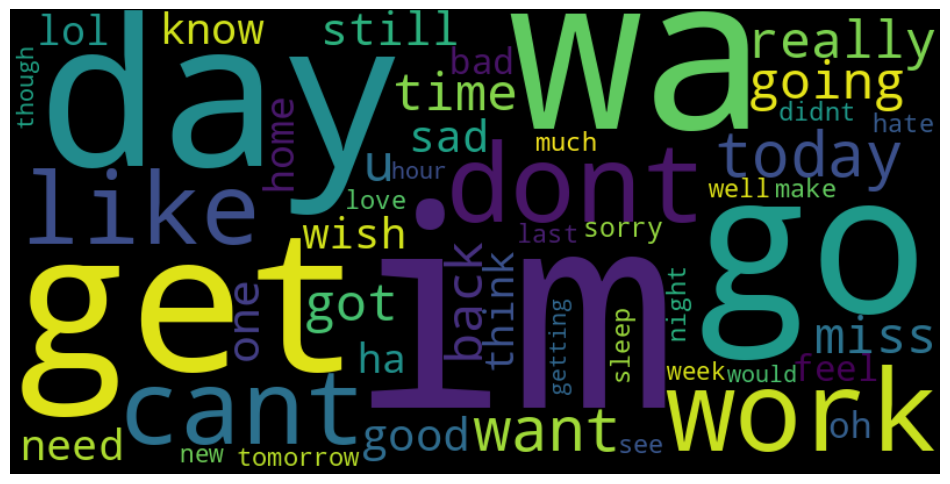

In [52]:
one_string = df_sample.loc[:, ['target','text_clean3']].query("target==0").loc[:,'text_clean3'].sum()
#Frequency of words
fdist = FreqDist(one_string)
#WordCloud
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

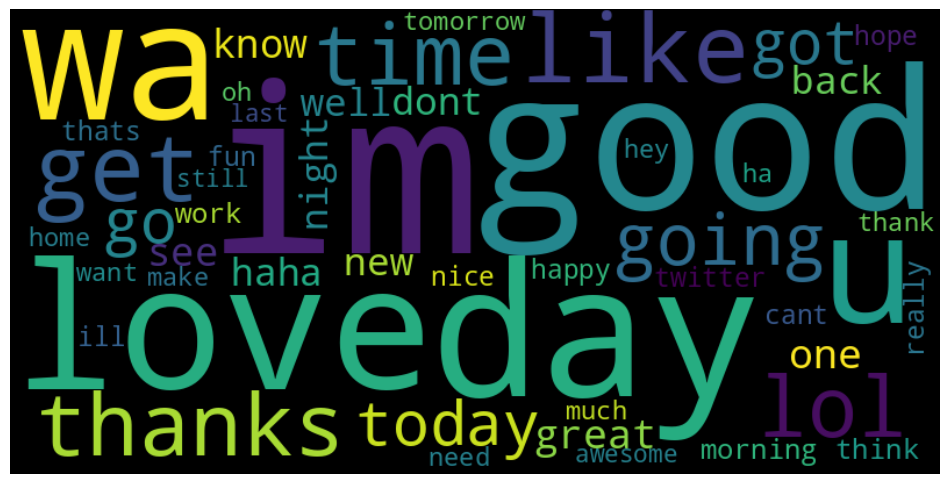

In [53]:
one_string = df_sample.loc[:, ['target','text_clean3']].query("target==1").loc[:,'text_clean3'].sum()
#Frequency of words
fdist = FreqDist(one_string)
#WordCloud
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:
path_import = '/content/drive/MyDrive/sentiment140/'
df_sample.to_excel(path_import+ 'df_sample_cleaned.xlsx')